In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# Any results you write to the current directory are saved as output.

In [2]:
df= pd.read_csv("/content/dataset(1).csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
print("Shape of the dataframe is",df.shape)
print("The number of nulls in each column are \n", df.isna().sum())

Shape of the dataframe is (14640, 15)
The number of nulls in each column are 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [4]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [5]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
from wordcloud import WordCloud,STOPWORDS

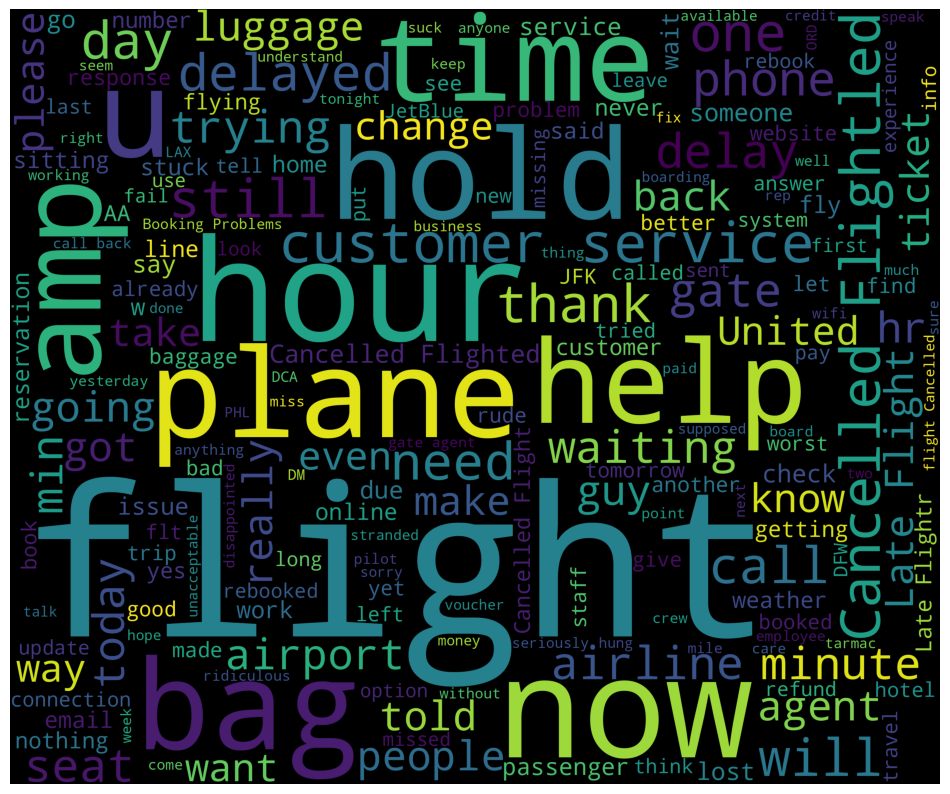

In [7]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [8]:
date = df.reset_index()
date.tweet_created = pd.to_datetime(date.tweet_created)
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

In [9]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

In [10]:
!pip install nltk

In [11]:
!nltk.download('stopwords')

/bin/bash: -c: line 1: syntax error near unexpected token `'stopwords''
/bin/bash: -c: line 1: `nltk.download('stopwords')'


In [12]:
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [13]:
Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]

Accuracy of DecisionTreeClassifier is 0.6901408450704225
              precision    recall  f1-score   support

    negative       0.81      0.78      0.80      1487
     neutral       0.44      0.49      0.47       477
    positive       0.57      0.57      0.57       379

    accuracy                           0.69      2343
   macro avg       0.61      0.62      0.61      2343
weighted avg       0.70      0.69      0.69      2343



<Figure size 640x480 with 0 Axes>

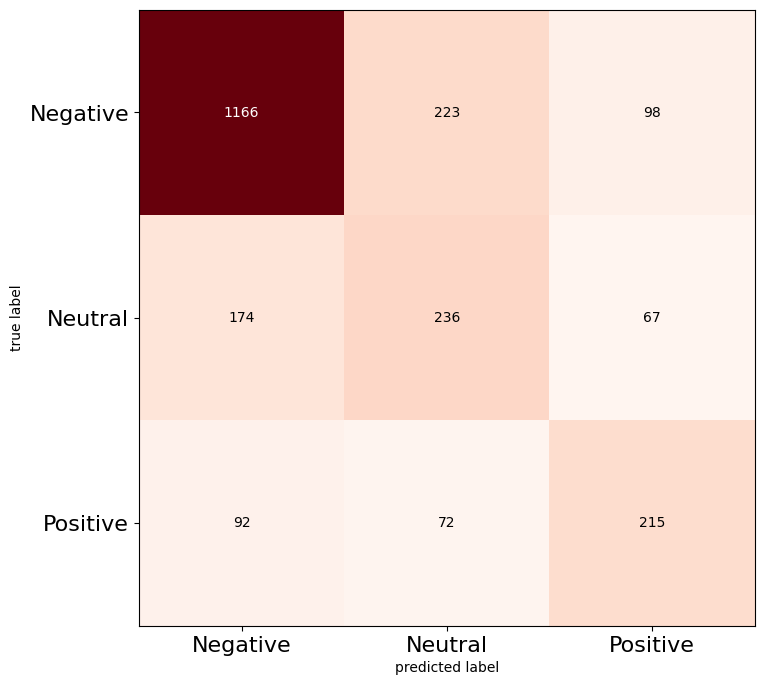

Accuracy of RandomForestClassifier is 0.7387964148527529
              precision    recall  f1-score   support

    negative       0.96      0.74      0.84      1845
     neutral       0.36      0.66      0.47       293
    positive       0.43      0.80      0.56       205

    accuracy                           0.74      2343
   macro avg       0.58      0.73      0.62      2343
weighted avg       0.84      0.74      0.77      2343



<Figure size 640x480 with 0 Axes>

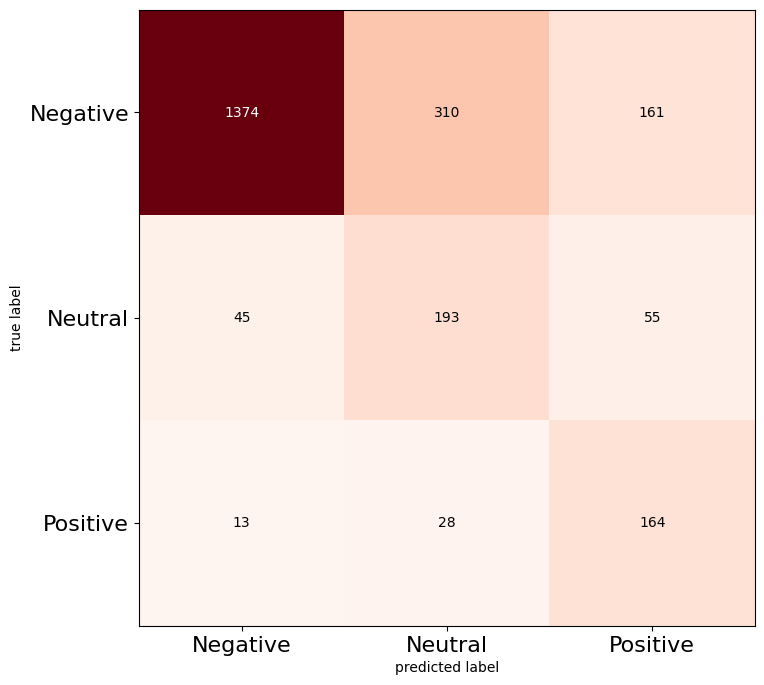

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

train_data, test_data, train_labels, test_labels = train_test_split(
    train['text'], train['airline_sentiment'], test_size=0.2, random_state=42
)

vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

dense_features = train_features.toarray()
dense_test = test_features.toarray()

Accuracy = []
Model = []

for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features, train_labels)
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features, train_labels)
        pred = fit.predict(dense_test)

    accuracy = accuracy_score(pred, test_labels)
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)

    print('Accuracy of ' + classifier.__class__.__name__ + ' is ' + str(accuracy))
    print(classification_report(pred, test_labels))

    cm = confusion_matrix(pred, test_labels)
    plt.figure()
    plot_confusion_matrix(cm, figsize=(12, 8), hide_ticks=True, cmap=plt.cm.Reds)
    plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16, color='black')
    plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
    plt.show()

Accuracy of DecisionTreeClassifier is 0.6922748612889458
              precision    recall  f1-score   support

    negative       0.82      0.78      0.80      1510
     neutral       0.44      0.49      0.46       474
    positive       0.55      0.58      0.57       359

    accuracy                           0.69      2343
   macro avg       0.60      0.62      0.61      2343
weighted avg       0.70      0.69      0.70      2343



<Figure size 640x480 with 0 Axes>

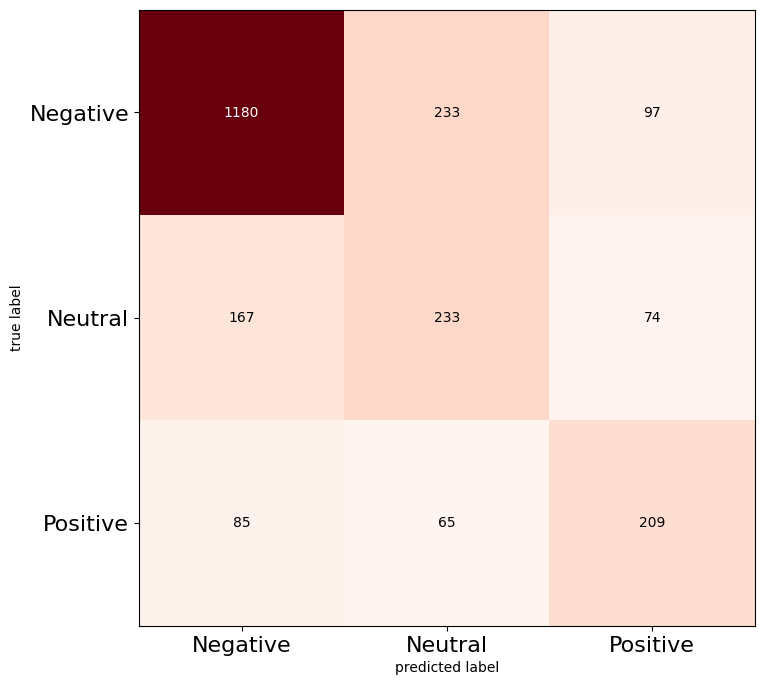

Accuracy of RandomForestClassifier is 0.7422108408023901
              precision    recall  f1-score   support

    negative       0.96      0.75      0.84      1840
     neutral       0.37      0.68      0.48       292
    positive       0.45      0.81      0.58       211

    accuracy                           0.74      2343
   macro avg       0.59      0.74      0.63      2343
weighted avg       0.84      0.74      0.77      2343



<Figure size 640x480 with 0 Axes>

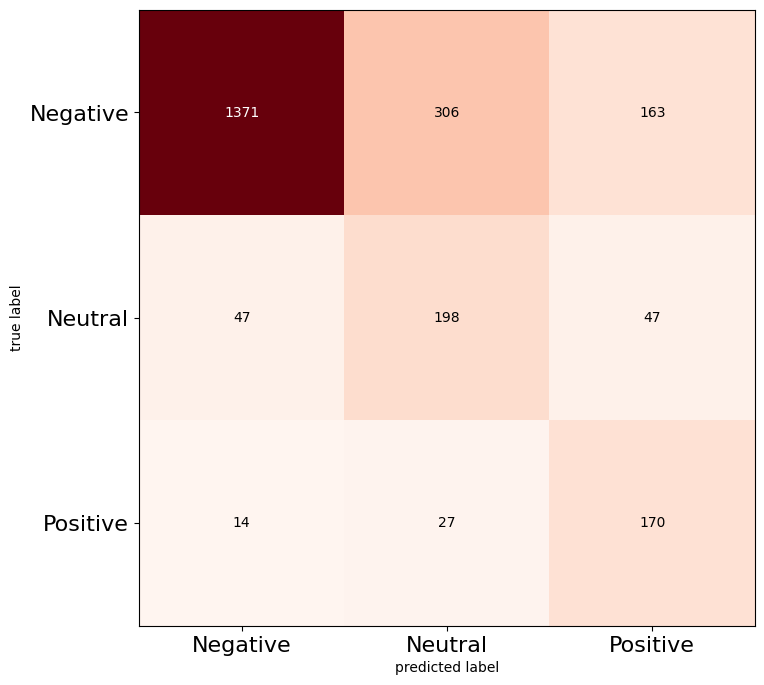

Accuracy of SVC is 0.7789159197609902
              precision    recall  f1-score   support

    negative       0.93      0.80      0.86      1667
     neutral       0.54      0.66      0.59       431
    positive       0.53      0.82      0.65       245

    accuracy                           0.78      2343
   macro avg       0.67      0.76      0.70      2343
weighted avg       0.82      0.78      0.79      2343



<Figure size 640x480 with 0 Axes>

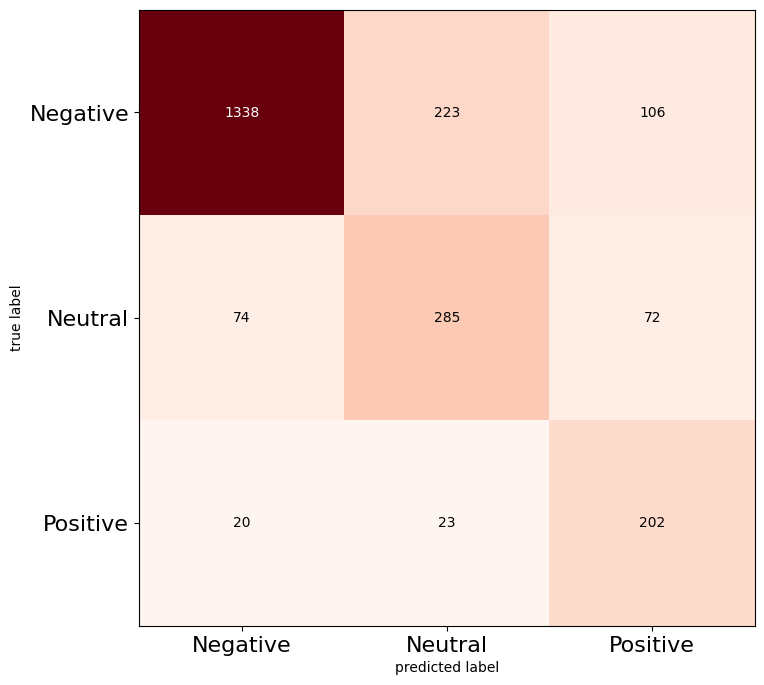

Accuracy of MultinomialNB is 0.7567221510883483
              precision    recall  f1-score   support

    negative       0.97      0.75      0.85      1847
     neutral       0.38      0.74      0.50       272
    positive       0.49      0.83      0.61       224

    accuracy                           0.76      2343
   macro avg       0.61      0.77      0.65      2343
weighted avg       0.85      0.76      0.78      2343



<Figure size 640x480 with 0 Axes>

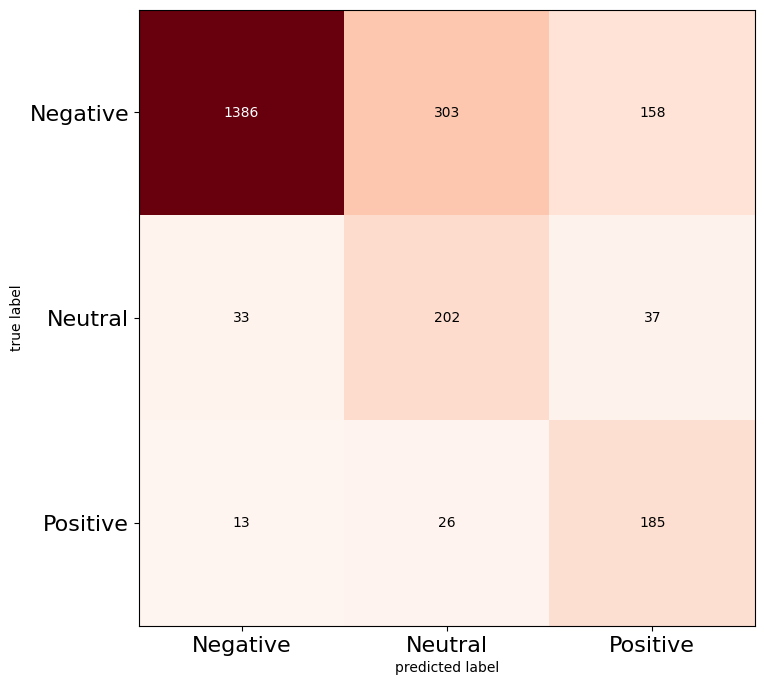

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define classifiers
Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    SVC(),
    MultinomialNB()
]

# Assuming train_data, test_data, train_labels, test_labels are defined
train_data, test_data, train_labels, test_labels = train_test_split(
    train['text'], train['airline_sentiment'], test_size=0.2, random_state=42
)

# Vectorize text data
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

# Train and evaluate each classifier
Accuracy = []
Model = []

for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features, train_labels)
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(train_data, train_labels)
        pred = fit.predict(test_data)

    accuracy = accuracy_score(pred, test_labels)
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)

    print('Accuracy of ' + classifier.__class__.__name__ + ' is ' + str(accuracy))
    print(classification_report(pred, test_labels))

    cm = confusion_matrix(pred, test_labels)
    plt.figure()
    plot_confusion_matrix(cm, figsize=(12, 8), hide_ticks=True, cmap=plt.cm.Reds)
    plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16, color='black')
    plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
    plt.show()


RANDOM FOREST ALGORITHM

Accuracy of Random Forest Classifier: 0.7405036278275715
              precision    recall  f1-score   support

    negative       0.96      0.74      0.84      1850
     neutral       0.36      0.67      0.47       287
    positive       0.43      0.80      0.56       206

    accuracy                           0.74      2343
   macro avg       0.59      0.74      0.62      2343
weighted avg       0.84      0.74      0.77      2343



<Figure size 640x480 with 0 Axes>

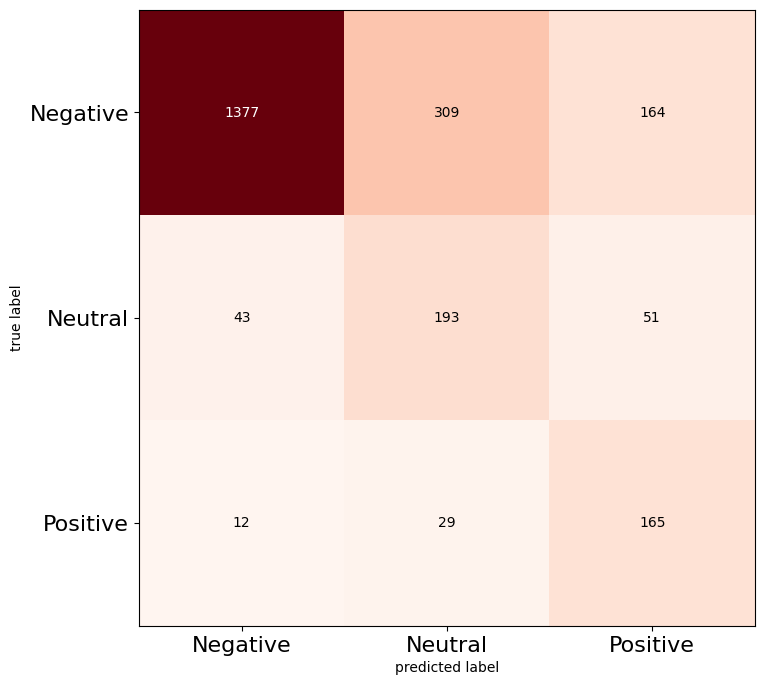

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming train_data, test_data, train_labels, test_labels are defined
train_data, test_data, train_labels, test_labels = train_test_split(
    train['text'], train['airline_sentiment'], test_size=0.2, random_state=42
)

# Vectorize text data
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

# Create and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200)
rf_classifier.fit(train_features, train_labels)

# Predict on test data
rf_predictions = rf_classifier.predict(test_features)

# Calculate accuracy
rf_accuracy = accuracy_score(rf_predictions, test_labels)
print('Accuracy of Random Forest Classifier:', rf_accuracy)

# Print classification report
print(classification_report(rf_predictions, test_labels))

# Plot confusion matrix
cm = confusion_matrix(rf_predictions, test_labels)
plt.figure()
plot_confusion_matrix(cm, figsize=(12, 8), hide_ticks=True, cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16, color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()


SVM ALGORITHM

Accuracy of SVM Classifier: 0.7789159197609902
              precision    recall  f1-score   support

    negative       0.93      0.80      0.86      1667
     neutral       0.54      0.66      0.59       431
    positive       0.53      0.82      0.65       245

    accuracy                           0.78      2343
   macro avg       0.67      0.76      0.70      2343
weighted avg       0.82      0.78      0.79      2343



<Figure size 640x480 with 0 Axes>

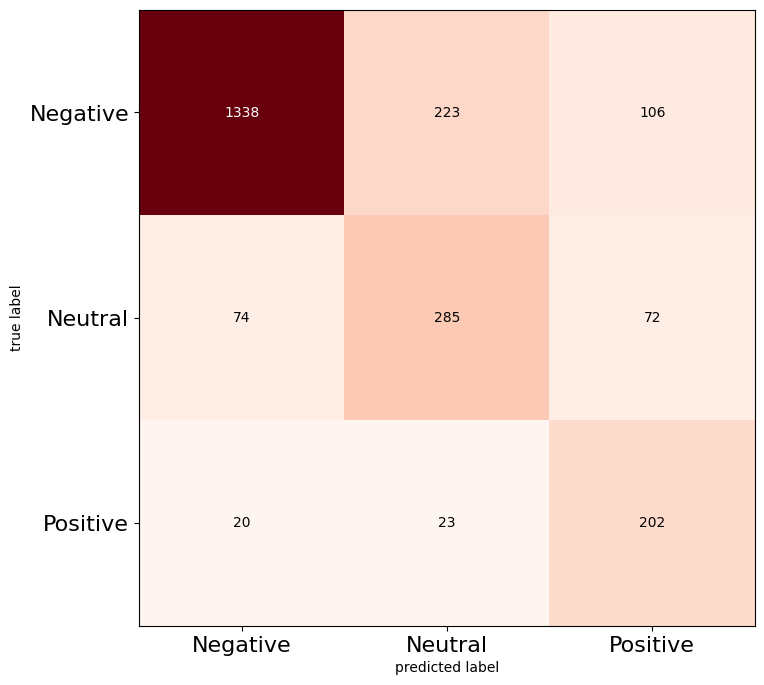

In [17]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming train_data, test_data, train_labels, test_labels are defined
train_data, test_data, train_labels, test_labels = train_test_split(
    train['text'], train['airline_sentiment'], test_size=0.2, random_state=42
)

# Vectorize text data
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

# Create and train SVM Classifier
svm_classifier = SVC()
svm_classifier.fit(train_features, train_labels)

# Predict on test data
svm_predictions = svm_classifier.predict(test_features)

# Calculate accuracy
svm_accuracy = accuracy_score(svm_predictions, test_labels)
print('Accuracy of SVM Classifier:', svm_accuracy)

# Print classification report
print(classification_report(svm_predictions, test_labels))

# Plot confusion matrix
cm = confusion_matrix(svm_predictions, test_labels)
plt.figure()
plot_confusion_matrix(cm, figsize=(12, 8), hide_ticks=True, cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16, color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()


NAIVE BAYES ALGORITHM

Accuracy of Naive Bayes Classifier: 0.7567221510883483
              precision    recall  f1-score   support

    negative       0.97      0.75      0.85      1847
     neutral       0.38      0.74      0.50       272
    positive       0.49      0.83      0.61       224

    accuracy                           0.76      2343
   macro avg       0.61      0.77      0.65      2343
weighted avg       0.85      0.76      0.78      2343



<Figure size 640x480 with 0 Axes>

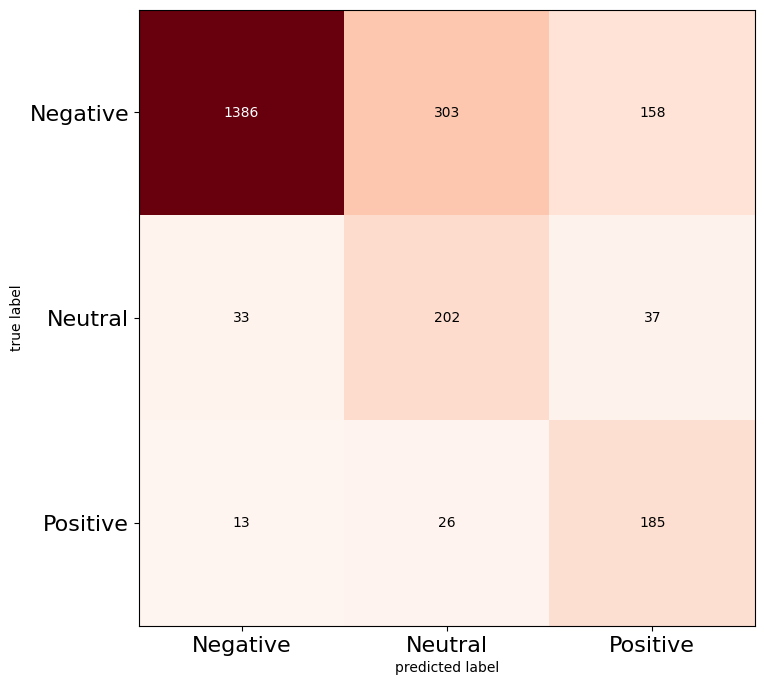

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming train_data, test_data, train_labels, test_labels are defined
train_data, test_data, train_labels, test_labels = train_test_split(
    train['text'], train['airline_sentiment'], test_size=0.2, random_state=42
)

# Vectorize text data
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

# Create and train Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(train_features, train_labels)

# Predict on test data
nb_predictions = nb_classifier.predict(test_features)

# Calculate accuracy
nb_accuracy = accuracy_score(nb_predictions, test_labels)
print('Accuracy of Naive Bayes Classifier:', nb_accuracy)

# Print classification report
print(classification_report(nb_predictions, test_labels))

# Plot confusion matrix
cm = confusion_matrix(nb_predictions, test_labels)
plt.figure()
plot_confusion_matrix(cm, figsize=(12, 8), hide_ticks=True, cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16, color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()
